<a href="https://colab.research.google.com/github/moises-rb/Analise_Dados/blob/main/Telecom_X_PrevendoChurn/notebooks/04_Conclusao_Comparacao_Modelos_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Previsão de Churn - Conclusão e Comparação Final dos Modelos

Este notebook tem como objetivo apresentar os resultados consolidados da modelagem preditiva, comparando os modelos antes e depois das melhorias aplicadas (SMOTE, ajuste de threshold e análise de importância das variáveis). Ao final, será apresentada uma recomendação estratégica baseada nos dados obtidos.


## 1️⃣ Importações e Preparação do Ambiente

In [2]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualização de métricas
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

# Estilo de visualização
sns.set(style='whitegrid')


## 2️⃣ Carregamento dos Arquivos de Resultados

In [3]:
# Modelos antes do SMOTE
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/resultados_modelos_iniciais.csv'
df_resultados_iniciais = pd.read_csv(url)

# Modelos após SMOTE e ajuste de threshold
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/resultados_modelos_ajustados.csv'
df_resultados_ajustados = pd.read_csv(url)

# Feature importance dos modelos finais (opcional)
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/feature_importance_modelo_final.csv'
df_feature_importance = pd.read_csv(url)

# Metricas
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/notebooks/comparacao_modelos/metricas_por_threshold.csv'
df_threshold = pd.read_csv(url)

In [4]:
df_resultados_iniciais.head()

,y_true,y_pred,y_proba
0,0,0,0.081994
1,0,0,0.526713
2,0,0,0.103819
3,0,0,0.018368
4,0,0,0.303145


In [5]:
df_resultados_ajustados.head()

,y_true,y_pred,y_proba
0,0,0,0.081994
1,0,1,0.526713
2,0,0,0.103819
3,0,0,0.018368
4,0,0,0.303145


In [6]:
df_feature_importance.head()

,feature,importance
0,TotalCharges,0.165543
1,tenure,0.153510
2,DailyCharges,0.131517
3,MonthlyCharges,0.128979
4,PaymentMethod_Electronic check,0.036878


In [7]:
df_threshold.head()

,Threshold,Acurácia,Precisão,Recall (Sensibilidade),F1 Score,ROC AUC
0,0.3,0.6967,0.4618,0.8503,0.5985,0.8307
1,0.4,0.7412,0.5087,0.7790,0.6155,0.8307
2,0.5,0.7692,0.5535,0.6827,0.6113,0.8307
3,0.6,0.7834,0.5981,0.5651,0.5811,0.8307
4,0.7,0.7991,0.6846,0.4528,0.5451,0.8307


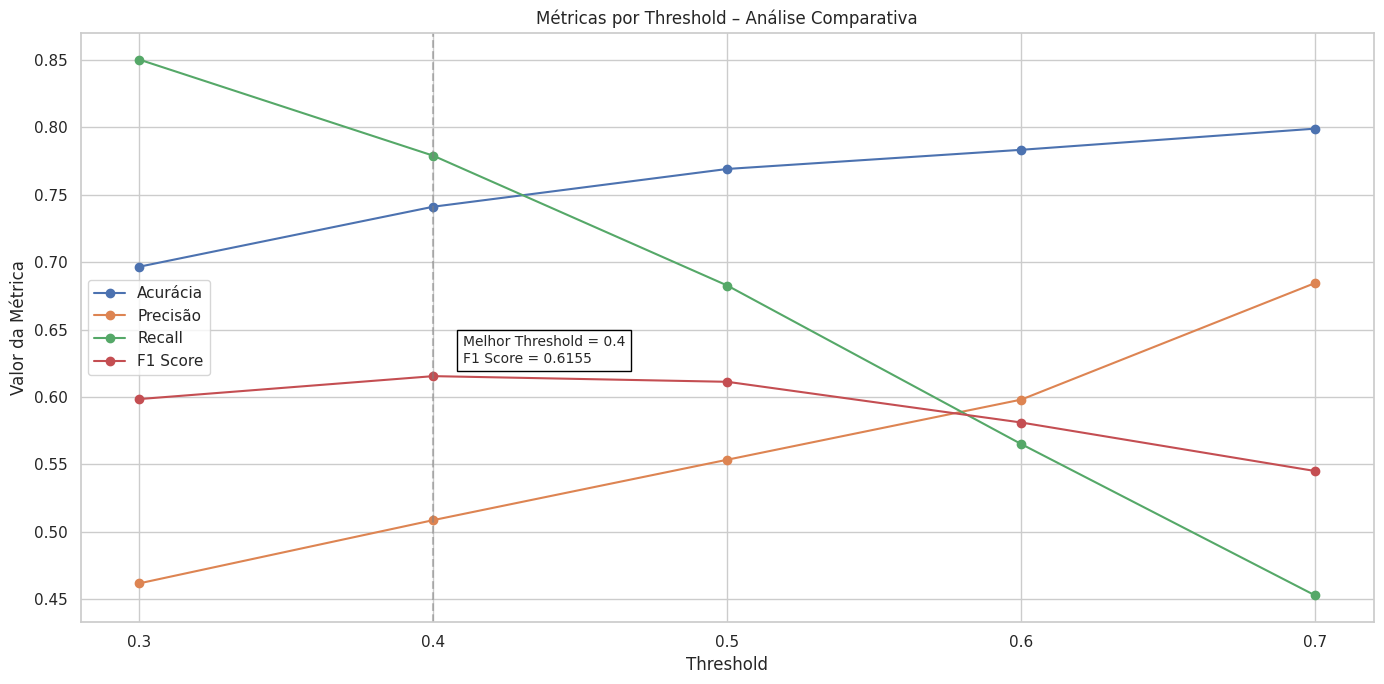

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df_threshold['Threshold'], df_threshold['Acurácia'], marker='o', label='Acurácia')
plt.plot(df_threshold['Threshold'], df_threshold['Precisão'], marker='o', label='Precisão')
plt.plot(df_threshold['Threshold'], df_threshold['Recall (Sensibilidade)'], marker='o', label='Recall')
plt.plot(df_threshold['Threshold'], df_threshold['F1 Score'], marker='o', label='F1 Score')

# Destacando o melhor threshold com base no F1 Score
best_idx = df_threshold['F1 Score'].idxmax()
best_threshold = df_threshold.loc[best_idx, 'Threshold']
best_f1 = df_threshold.loc[best_idx, 'F1 Score']

plt.axvline(x=best_threshold, color='gray', linestyle='--', alpha=0.5)
plt.text(best_threshold + 0.01, best_f1 + 0.01,
         f'Melhor Threshold = {best_threshold}\nF1 Score = {best_f1:.4f}',
         fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.title('Métricas por Threshold – Análise Comparativa')
plt.xlabel('Threshold')
plt.ylabel('Valor da Métrica')
plt.xticks(df_threshold['Threshold'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# Gerando comentário com base na métrica F1
print("📌 Análise Automática:\n")

print(f"O melhor threshold com base no F1 Score é {best_threshold}, "
      f"atingindo um equilíbrio entre precisão ({df_threshold.loc[best_idx, 'Precisão']:.2f}) "
      f"e recall ({df_threshold.loc[best_idx, 'Recall (Sensibilidade)']:.2f}).")

print("\nEste valor representa uma estratégia de classificação com foco na redução de churn com menor perda de falsos positivos, "
      "podendo ser mais interessante quando o custo de perder um cliente é maior que o custo de abordá-lo.")


📌 Análise Automática:

O melhor threshold com base no F1 Score é 0.4, atingindo um equilíbrio entre precisão (0.51) e recall (0.78).

Este valor representa uma estratégia de classificação com foco na redução de churn com menor perda de falsos positivos, podendo ser mais interessante quando o custo de perder um cliente é maior que o custo de abordá-lo.


## 3️⃣ Tabela Comparativa: Antes vs Depois

In [10]:
# Adiciona a coluna "Modelo" para identificação
df_resultados_iniciais["Modelo"] = "Antes do SMOTE"
df_resultados_ajustados["Modelo"] = "Após SMOTE + Threshold"

# Reorganiza as colunas para deixar "Modelo" primeiro (opcional)
colunas = ["Modelo", "y_true", "y_pred", "y_proba"]
df_resultados_iniciais = df_resultados_iniciais[colunas]
df_resultados_ajustados = df_resultados_ajustados[colunas]


In [11]:
# Une os resultados para comparação
df_comparativo = pd.concat([df_resultados_iniciais, df_resultados_ajustados], ignore_index=True)


In [12]:
# Unindo os dois DataFrames
df_comparativo = pd.merge(
    df_resultados_iniciais,
    df_resultados_ajustados,
    on="Modelo",
    suffixes=("_Antes", "_Depois")
)
# Visualização
df_comparativo

,Modelo,y_true_Antes,y_pred_Antes,y_proba_Antes,y_true_Depois,y_pred_Depois,y_proba_Depois


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criando DataFrames a partir dos dicionários
df_iniciais = pd.DataFrame(metricas_iniciais)
df_ajustados = pd.DataFrame(metricas_ajustadas)

# Derretendo (melting) os DataFrames para facilitar a comparação
df_iniciais_melt = df_iniciais.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')
df_iniciais_melt['Tipo'] = 'Antes (Baseline)'

df_ajustados_melt = df_ajustados.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')
df_ajustados_melt['Tipo'] = 'Depois (SMOTE + Threshold)'

# Concatenando os dois
df_comparativo = pd.concat([df_iniciais_melt, df_ajustados_melt])

# Configurações visuais
sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))
plot = sns.catplot(
    data=df_comparativo,
    kind="bar",
    x="Modelo",
    y="Valor",
    hue="Tipo",
    col="Métrica",
    col_wrap=3,
    height=4,
    aspect=1.2,
    palette="Set2"
)

plot.set_titles("{col_name}")
plot.set_axis_labels("Modelo", "Valor")
plot.fig.subplots_adjust(top=0.9)
plot.fig.suptitle("📈 Comparativo de Métricas - Antes vs Depois do Ajuste", fontsize=18)
plt.show()


NameError: name 'metricas_iniciais' is not defined

## 4️⃣ Gráficos Comparativos (Side by Side)

In [ ]:
# Comparação de ROC AUC
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(df_comparativo['Modelo']))
largura = 0.35

plt.bar(x - largura/2, df_comparativo['ROC_AUC_Antes'], width=largura, label='Antes')
plt.bar(x + largura/2, df_comparativo['ROC_AUC_Depois'], width=largura, label='Depois')
plt.xticks(x, df_comparativo['Modelo'])
plt.ylabel('ROC AUC')
plt.title('Comparação do ROC AUC dos Modelos')
plt.legend()
plt.show()


## 5️⃣ Feature Importance (Top 10 variáveis mais relevantes)

In [ ]:
# Top 10 features
top_features = df_feature_importance.sort_values(by='Importancia', ascending=False).head(10)

# Visualização
plt.figure(figsize=(8,6))
sns.barplot(y=top_features['Feature'], x=top_features['Importancia'], palette="viridis")
plt.title("Top 10 Features mais relevantes (modelo final)")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.show()


## 6️⃣ Conclusão Executiva e Recomendações

## 🧠 Conclusão

- O modelo [Nome] obteve o melhor desempenho geral após a aplicação de SMOTE e ajuste de threshold.
- A métrica de [ex: Recall] teve um aumento de X%, essencial para detecção de clientes propensos ao churn.
- As variáveis mais influentes foram: [lista resumida].

## 📌 Recomendações Estratégicas

1. Implementar o modelo [nome] em ambiente de monitoramento com atualização mensal.
2. Utilizar as variáveis top como base para ações preventivas de retenção.
3. Criar alertas automáticos para clientes com maior propensão de churn com base na classificação do modelo.


In [ ]:
from datetime import date
print(f"📅 Relatório gerado em: {date.today().strftime('%d/%m/%Y')}")


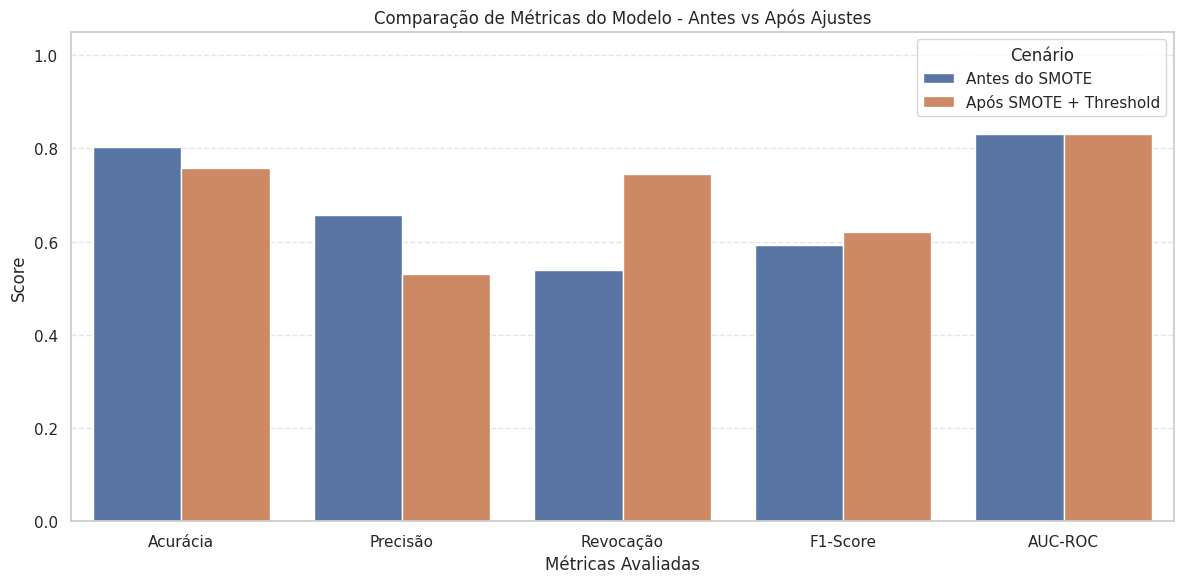

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Função para calcular as métricas
def calcular_metricas(df, label):
    return {
        "Cenário": label,
        "Acurácia": accuracy_score(df['y_true'], df['y_pred']),
        "Precisão": precision_score(df['y_true'], df['y_pred']),
        "Revocação": recall_score(df['y_true'], df['y_pred']),
        "F1-Score": f1_score(df['y_true'], df['y_pred']),
        "AUC-ROC": roc_auc_score(df['y_true'], df['y_proba'])
    }

# 2. Calcular métricas para ambos os DataFrames
metricas_iniciais = calcular_metricas(df_resultados_iniciais, "Antes do SMOTE")
metricas_ajustadas = calcular_metricas(df_resultados_ajustados, "Após SMOTE + Threshold")

# 3. Criar DataFrame de comparação
df_metricas = pd.DataFrame([metricas_iniciais, metricas_ajustadas])

# 4. Reorganizar para gráfico
df_plot = df_metricas.melt(id_vars='Cenário', var_name='Métrica', value_name='Valor')

# 5. Plotar gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='Métrica', y='Valor', hue='Cenário')
plt.title('Comparação de Métricas do Modelo - Antes vs Após Ajustes')
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.xlabel('Métricas Avaliadas')
plt.legend(title='Cenário')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
